In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("startup_funding.csv")

In [3]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [4]:
df.shape 

(2372, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [6]:
df.isnull().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

#### Answer 1 

In [7]:
df["CityLocation"].unique()

array(['Bangalore', 'Mumbai', 'New Delhi', 'Hyderabad', 'Ahmedabad',
       'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'bangalore', 'Trivandrum',
       'Chennai', 'Chandigarh', 'Jaipur', 'Vadodara', 'Surat',
       'Missourie', 'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi',
       'Indore', 'Singapore', 'Goa', 'Agra', 'Bangalore/ Bangkok',
       'Hubli', 'Delhi', 'Kerala', 'Kozhikode', 'US', 'Coimbatore',
       'Siliguri', nan, 'USA', 'Lucknow', 'Kanpur', 'SFO / Bangalore',
       'London', 'Seattle / Bangalore', 'Pune/Seattle', 'Pune / Dubai',
       'Bangalore / SFO', 'Varanasi', 'Bhopal', 'New Delhi / US',
       'Mumbai / UK', 'Jodhpur', 'Hyderabad/USA', 'Boston',
       'Bangalore / Palo Alto', 'Mumbai / NY', 'USA/India',
       'Goa/Hyderabad', 'Noida / Singapore', 'Belgaum', 'Pune / US',
       'Chennai/ Singapore', 'Pune / Singapore', 'Bangalore / San Mateo',
       'New York/ India', 'US/India', 'Gurgaon / SFO', 'Bangalore / USA',
       'New Delhi/ Houston', 'Nagpur', 'Mumbai

In [8]:
df["City"] = df["CityLocation"].replace({"Delhi":"New Delhi","bangalore":"Bangalore"})

In [9]:
city_df = df["City"].str.split("/").str[0].str.strip().value_counts().reset_index().rename(columns={"index":"City","City":"no_of_funding"})

In [10]:
city_df.head()

,City,no_of_funding
0,Bangalore,635
1,Mumbai,449
2,New Delhi,389
3,Gurgaon,241
4,Pune,91


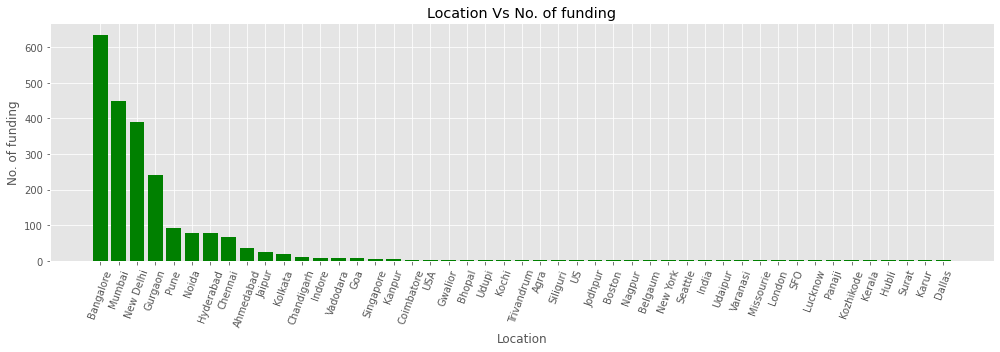

In [11]:
plt.figure(figsize=(14,5))
plt.style.use("ggplot")
plt.bar(city_df["City"],city_df["no_of_funding"],color="green")
plt.xticks(rotation = 70)
plt.title("Location Vs No. of funding")
plt.xlabel("Location")
plt.ylabel("No. of funding")
plt.tight_layout()
plt.show()

In [12]:
city_df["City"] = city_df["City"].replace({"New Delhi":"NCR","Gurgaon":"NCR","Noida":"NCR"})

In [13]:
top_3_city = (city_df.groupby("City").sum().sort_values(by="no_of_funding",ascending=False) * 100.0/city_df["no_of_funding"].sum())[:3]

In [14]:
top_3_city

,no_of_funding
City,
NCR,32.330141
Bangalore,28.955768
Mumbai,20.474236


* So 82% of the total funding came from these 3 location so there will be higher chance that he would get investment 

#### answer 2 

In [15]:
df["InvestorsName"] = df["InvestorsName"].fillna("Dummy")

In [16]:
investor_df = df.copy()

In [17]:
startup_name = []
investor_name = []
invest_type = []

for i in range(len(investor_df)):
    var1 = investor_df["StartupName"][i]
    var2 = investor_df["InvestorsName"][i]
    var3 = var2.split(",")
    var4 = investor_df["InvestmentType"][i]
    
    for j in range(len(var3)):
        startup_name.append(var1)
        investor_name.append(var3[j].strip())
        invest_type.append(var4)

In [18]:
startup_df = pd.DataFrame({"startupname":startup_name,"investors":investor_name,"invest_type":invest_type})
startup_df.head()

,startupname,investors,invest_type
0,TouchKin,Kae Capital,Private Equity
1,Ethinos,Triton Investment Advisors,Private Equity
2,Leverage Edu,Kashyap Deorah,Seed Funding
3,Leverage Edu,Anand Sankeshwar,Seed Funding
4,Leverage Edu,Deepak Jain,Seed Funding


In [19]:
startup_df.shape

(4577, 3)

* Correct the error in investment type field 

In [20]:
startup_df["invest_type"].unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

In [21]:
startup_df["invest_type"] = startup_df["invest_type"].replace({"Crowd funding":"Crowd Funding","PrivateEquity":"Private Equity","SeedFunding":"Seed Funding"})

In [22]:
startup_df[startup_df["startupname"].str.find("ytm")!=-1]["startupname"].unique()

array(['Paytm', 'Paytm Marketplace'], dtype=object)

In [23]:
startup_df[startup_df["startupname"].str.find("kart")!=-1]["startupname"].unique()

array(['Flipkart', 'Lenskart', 'Schoolkart', 'Splitkart', 'Lendingkart',
       'Omnikart', 'Flipkart.com', '1mg (Healthkartplus)', 'Fxkart.com'],
      dtype=object)

In [24]:
startup_df[startup_df["startupname"].str.find("flip")!=-1]["startupname"].unique()

array(['Stylflip'], dtype=object)

In [25]:
startup_df[startup_df["startupname"].str.find("ola")!=-1]["startupname"].unique()

array(['HolaChef', 'Oriano Solar', 'Truckola', 'SolarTown', 'Kolabro',
       'EzySolare', 'Applied Solar Technologies', 'Holachef'],
      dtype=object)

In [26]:
startup_df[startup_df["startupname"].str.find("Ola")!=-1]["startupname"].unique()

array(['Ola', 'Ola Cabs', 'Olacabs'], dtype=object)

In [27]:
startup_df[startup_df["startupname"].str.find("deal")!=-1]["startupname"].unique()

array(['Ideal Insurance', 'Snapdeal', 'Bestdealfinance'], dtype=object)

In [28]:
startup_df[startup_df["startupname"].str.find("Deal")!=-1]["startupname"].unique()

array(['Deal4Loans / Wishfin', 'Deal 4Loans', 'Deal Street Asia',
       'Dealwithus'], dtype=object)

In [29]:
startup_df[startup_df["startupname"].str.find("Snap")!=-1]["startupname"].unique()

array(['Snapdeal', 'Snapbizz', 'Snapshopr', 'SnapBizz'], dtype=object)

In [30]:
startup_df[startup_df["startupname"].str.find("snap")!=-1]["startupname"].unique()

array([], dtype=object)

In [31]:
startup_df[startup_df["startupname"].str.find("oms")!=-1]["startupname"].unique()

array(['Vista Rooms', 'Oyo Rooms', 'First Moms Club', 'OyoRooms',
       'RoomsTonite', 'Deyor Rooms', 'Oyorooms', 'Zo Rooms', 'OYO Rooms'],
      dtype=object)

In [32]:
startup_df[startup_df["startupname"].str.find("OYO")!=-1]["startupname"].unique()

array(['OYOfit', 'OYO Rooms'], dtype=object)

In [33]:
startup_df[startup_df["startupname"].str.find("Oyo")!=-1]["startupname"].unique()

array(['Oyo Rooms', 'OyoRooms', 'Oyo', 'Oyorooms'], dtype=object)

* Correct the error in startup name field 

In [34]:
startup_df["startupname"] = startup_df["startupname"].replace({"Paytm Marketplace":"Paytm","Flipkart.com":"Flipkart",'Ola Cabs':"Ola" ,'Olacabs':"Ola","Oyo Rooms":"OYO Rooms","OyoRooms":"OYO Rooms","Oyorooms":"OYO Rooms","Oyo":"OYO Rooms"})

In [35]:
startup_df[startup_df["startupname"].str.find("Oyo")!=-1]["startupname"].unique()

array([], dtype=object)

In [36]:
startup_df.groupby("investors").size().sort_values(ascending=False)[:5].to_frame("counts")

,counts
investors,
Sequoia Capital,64
Accel Partners,53
Kalaari Capital,44
SAIF Partners,41
Indian Angel Network,40


#### answer 3

In [37]:
unique_invest = startup_df.groupby(["startupname","investors"]).size().reset_index()

In [38]:
unique_invest[unique_invest["investors"]!=""]["investors"].value_counts()[:5]

Sequoia Capital         48
Accel Partners          47
Kalaari Capital         41
Indian Angel Network    40
Blume Ventures          36
Name: investors, dtype: int64

####  answer 4 

In [39]:
early_df = startup_df[startup_df["invest_type"].isin(["Seed Funding","Crowd Funding"])]

In [40]:
early_df_unique = early_df.groupby(["startupname","investors"]).size().reset_index()

In [41]:
early_df_unique[early_df_unique["investors"]!=""]["investors"].value_counts()[:5]

Indian Angel Network     33
Undisclosed Investors    27
Undisclosed investors    24
Rajan Anandan            23
Anupam Mittal            16
Name: investors, dtype: int64

####  answer 5

In [42]:
growth_df = startup_df[startup_df["invest_type"].isin(["Private Equity"])]

In [43]:
growth_df_unique = growth_df.groupby(["startupname","investors"]).size().reset_index()

In [44]:
growth_df_unique["investors"].value_counts()[:5]

Sequoia Capital    45
Accel Partners     43
Kalaari Capital    35
Blume Ventures     27
SAIF Partners      24
Name: investors, dtype: int64